In [47]:
# Warming Up
import pandas as pd
import numpy as np

fPath = './data/vgsales.csv'
df = pd.read_csv(fPath)

# trying to create 1.5% worth of duplicates
rws = df.shape[0]
col = df.shape[1]

'''
# Commented out def, as there are actual duplicates once rank is removed

from random import randrange
rwRtio = int(.015 * rws) # float is truncated
print('Number of instances before duplication = %d' % (rws))

def eenyMeeny():
     # select a random row
    tg = df.iloc[randrange(0, rws)]
    # return randomly selected row
    return tg

for i in range(rwRtio):
    # Also reported issues on this line
    df = df.append(eenyMeeny(), ignore_index=True)
rws = df.shape[0]
'''

print('Number of instances = %d' % (rws))
print('Number of attributes = %d' % (col))
print(df.head())
# Tables that Michael Berbach will use
dfMB = df

Number of instances = 16598
Number of attributes = 11
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


### Missing Values

In [48]:
data = df.replace('?',np.NaN)

print('Number of instances = %d' % (rws))
print('Number of attributes = %d' % (col))

print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Number of instances = 16598
Number of attributes = 11
Number of missing values:
	Rank: 0
	Name: 0
	Platform: 0
	Year: 271
	Genre: 0
	Publisher: 58
	NA_Sales: 0
	EU_Sales: 0
	JP_Sales: 0
	Other_Sales: 0
	Global_Sales: 0


In [49]:
print('Number of rows in original data = %d' % (rws))
df = df.dropna()
print('Number of rows after discarding missing values = %d' % (df.shape[0]))
print('Difference in number of rows = %d' % (rws-df.shape[0]))
# update rws
rws = df.shape[0]

Number of rows in original data = 16598
Number of rows after discarding missing values = 16291
Difference in number of rows = 307


### Outliers
One way of preprocessing the data set is to prepare it for predicting a video game's sales based on its genre. It could be useful for publishers to know what genre of game to develop based on a prediction with this data. To do so, we will need to prepare the data set for normalization and remove outliers.
- Author: Rahul G

#### One Hot Encoding
Start by using one-hot encoding to convert the genre categorical attribute into numerical values. One-hot encoding is crucial if we are including genre and normalizing the data set since categorical attributes without one-hot encoding are not compatible with normalization.

In [50]:
normalized = df
one_hot = pd.get_dummies(normalized['Genre'])

one_hot[20:23]

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
20,0,0,0,0,0,0,0,1,0,0,0,0
21,0,0,0,0,1,0,0,0,0,0,0,0
22,0,0,0,0,1,0,0,0,0,0,0,0


#### Dropping Columns
We also need to drop columns that do not fit the specific needs of the neural network. In this case, anything that is not genre or sales data. However, we will also drop genre as well and later replace it with the one-hot encoded columns made in the previous step.

In [51]:
print('Number of columns before discarding columns = %d' % (normalized.shape[1]))

normalized = normalized.drop(['Rank', 'Name', 'Platform', 'Genre', 'Year', 'Publisher'], axis=1)

print('Number of columns after discarding columns = %d' % (normalized.shape[1]))

Number of columns before discarding columns = 11
Number of columns after discarding columns = 5


#### Concatenating Rows and Columns
After dropping the unnecessary columns, we now want to add the one-hot encoded genres to the main dataframe. To add the one-hot encoded rows and columns to the dataframe, we will use the pandas function concat, which will combine them both into one dataframe.

In [52]:
normalized = pd.concat([one_hot, normalized], axis=1)

normalized[20:23]

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
20,0,0,0,0,0,0,0,1,0,0,0,0,6.42,4.52,6.04,1.37,18.36
21,0,0,0,0,1,0,0,0,0,0,0,0,10.83,2.71,4.18,0.42,18.14
22,0,0,0,0,1,0,0,0,0,0,0,0,9.54,3.44,3.84,0.46,17.28


#### Normalization
Now, we will normalize the data to find and remove any outliers. Doing so will make it easier for the neural network to find and identify patterns with genre and sales data. All data will be converted into z scores with the following formula: z score = (x - mean)/standard deviation.

In [12]:
normalized = (normalized-normalized.mean())/normalized.std()

normalized[20:23]

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
20,-0.499294,-0.291259,-0.232571,-0.339754,-0.238235,-0.190407,-0.285138,3.175168,-0.29225,-0.234325,-0.40585,-0.207095,7.483114,8.584810,19.113686,6.952620,11.368968
21,-0.499294,-0.291259,-0.232571,-0.339754,4.197285,-0.190407,-0.285138,-0.314925,-0.29225,-0.234325,-0.40585,-0.207095,12.845259,5.030933,13.149844,1.954799,11.228603
22,-0.499294,-0.291259,-0.232571,-0.339754,4.197285,-0.190407,-0.285138,-0.314925,-0.29225,-0.234325,-0.40585,-0.207095,11.276740,6.464264,12.059680,2.165234,10.679905


#### Removing Outliers
After getting z scores, it is now possible to find outliers and remove them. Since all columns have been converted into z scores, we need to see if values are greater than -3 or less than or equal to 3. Rows that fall into that range are not outliers and are included in removed_outliers. However, rows that fall outside of that range are outliers and are excluded from the dataframe removed_outliers.


In [54]:
print('Number of rows before discarding outliers = %d' % (normalized.shape[0]))

removed_outliers = normalized.loc[((normalized > -3).sum(axis=1)==17) & ((normalized <= 3).sum(axis=1)==17)]
print('Number of rows after discarding outliers values = %d' % (removed_outliers.shape[0]))

removed_outliers[20:23]

Number of rows before discarding outliers = 16291
Number of rows after discarding outliers values = 7060


,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
325,2.002705,-0.291259,-0.232571,-0.339754,-0.238235,-0.190407,-0.285138,-0.314925,-0.29225,-0.234325,-0.405850,-0.207095,1.889947,2.144635,1.254224,1.060453,2.060230
327,-0.499294,-0.291259,-0.232571,2.943125,-0.238235,-0.190407,-0.285138,-0.314925,-0.29225,-0.234325,-0.405850,-0.207095,2.084492,2.596232,-0.252768,1.428713,2.053849
339,-0.499294,-0.291259,-0.232571,-0.339754,-0.238235,-0.190407,-0.285138,-0.314925,-0.29225,-0.234325,2.463813,-0.207095,2.266878,2.026827,-0.220704,1.586539,1.996428


### Duplicate Data

In [55]:

# It was found that duplicates exist when the rank attribute is removed
dfMB = dfMB.drop(['Rank'], axis=1)
dups = dfMB.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
dfMB.loc[dfMB.duplicated(keep=False)]

Number of duplicate rows = 1


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14997,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02
14999,Wii de Asobu: Metroid Prime,Wii,NaN,Shooter,Nintendo,0.0,0.0,0.02,0.0,0.02


In [56]:
print('Number of rows before discarding duplicates = %d' % (rws))
dfMB = dfMB.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (dfMB.shape[0]))

Number of rows before discarding duplicates = 16291
Number of rows after discarding duplicates = 16597


### Shuffling Dataframes

In [57]:
dfMB = dfMB.reindex(np.random.permutation(dfMB.index))
dfMB.reset_index(inplace=True, drop=True)
dfMB
# Shuffling is aparent as it was
# originally ranked in order of global sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Risen,PC,2009.0,Role-Playing,Deep Silver,0.00,0.11,0.00,0.03,0.14
1,Jake Hunter Detective Story: Memories of the Past,DS,2007.0,Adventure,PQube,0.06,0.00,0.05,0.00,0.11
2,Monster Jam: Path of Destruction,PS3,2010.0,Racing,Activision,0.21,0.02,0.00,0.02,0.24
3,Brave: A Warrior's Tale,X360,2009.0,Action,SouthPeak Games,0.05,0.01,0.00,0.00,0.06
4,Puppy Luv: Spa and Resort,DS,2007.0,Simulation,Activision,0.40,0.00,0.00,0.03,0.44
...,...,...,...,...,...,...,...,...,...,...
16592,Matchbox Cross Town Heroes,GBA,2002.0,Racing,THQ,0.12,0.04,0.00,0.00,0.17
16593,Monster Jam: Urban Assault,DS,2008.0,Racing,Activision,0.37,0.00,0.00,0.03,0.39
16594,James Bond 007: Legends,WiiU,2012.0,Shooter,Activision,0.07,0.05,0.00,0.01,0.13
16595,Colin McRae Rally 04,PC,2004.0,Racing,Codemasters,0.00,0.01,0.00,0.00,0.01


### Sorting Dataframes

In [60]:
# sorting first by year, then by global sales
dfMB = dfMB.sort_values(by=['Year','Global_Sales'],ascending=[True, False])
# Also getting rid of any rows that dont have a year
# So we can see the full range
dfMB = dfMB.dropna(subset=['Year'])
dfMB

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11441,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
7059,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.00,0.03,2.76
16296,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.00,0.01,1.15
8918,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.00,0.01,1.05
10709,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
...,...,...,...,...,...,...,...,...,...,...
14169,Goat Simulator,XOne,2016.0,Simulation,Koch Media,0.00,0.01,0.00,0.00,0.01
15167,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
14001,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
16567,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01


We can see it spans about 40 years with the data we have left

In [62]:
print("The first game with the most sales is: {}".format(dfMB['Name'].iloc[0]))
print("The first car is: {}".format(dfMB['Name'].loc[0]))
# check readout from shuffling frames if confused by what above line produces

#loc gets rows (or columns) with particular labels from the index.
#iloc gets rows (or columns) at particular positions in the index (so it only takes integers).

The first game with the most sales is: Asteroids
The first car is: Risen


### Saving a Dataframe

In [64]:
import os

# Relative path within the repository
writeFlnam = os.path.join("data", "vgsalesMB.csv")

# Ensure the 'data' directory exists
os.makedirs(os.path.dirname(writeFlnam), exist_ok=True)

# Save the DataFrame
dfMB.to_csv(writeFlnam, index=False)
print("DataFrame saved to: {}".format(writeFlnam))

DataFrame saved to: data\vgsalesMB.csv


### Principle Components Analysis
PCA reduces the number of attributes within the data by projecting the data into a new lower-dimensional space.

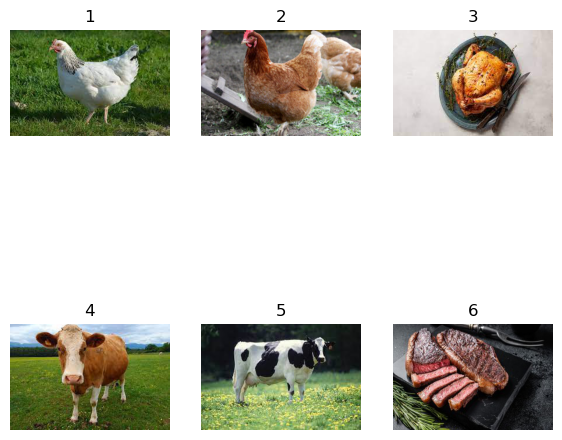

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

numImages = 6
fig = plt.figure(figsize=(7,7))
# initialized imgData to None, will update accordingly after reading in first image
imgData = None

for i in range(1,numImages+1):
    filename = '/Users/pennyherrera/Desktop/CSC 177/Animals/animals'+str(i)+'.jpg'
    img = mpimg.imread(filename)
    ax = fig.add_subplot(2,3,i)
    plt.imshow(img)
    plt.axis('off')
    ax.set_title(str(i))
    
    # flatten & reshape image to ensure its 1D array
    flattened_img = img.flatten()
    
    # initializing imgData array w/ correct shape
    if imgData is None:
        imgData = np.zeros((numImages, flattened_img.shape[0]))

    # assigning flattened image to corresponding row in imgData
    imgData[i-1] = flattened_img

plt.show()


The data matrix has been projected to its first 2 principle components, pc1 and pc2.

In [4]:
import pandas as pd
from sklearn.decomposition import PCA
numComponents = 2
pca = PCA(n_components=numComponents)
pca.fit(imgData)
projected = pca.transform(imgData)
projected = pd.DataFrame(
    projected,columns=['pc1','pc2'],index=range(1,numImages+1))
projected['animal'] = ['chicken', 'chicken', 'chicken', 'cow', 'cow', 'cow']
projected

,pc1,pc2,animal
1,-14911.128128,-3718.699533,chicken
2,2866.675471,4424.029291,chicken
3,33995.622143,3805.928665,chicken
4,2335.020718,-17876.537343,cow
5,-11924.039583,21566.454856,cow
6,-12362.150621,-8201.175936,cow


The scatter plot displays the projected values. The images for chicken seem to follow the x-axis 
while the images for cow are loosely arranged in a vertical pattern.
The images for chicken and cow were chosen randomly. Each animal image has a different color scheme, making it difficult for the PCA to group similar images.

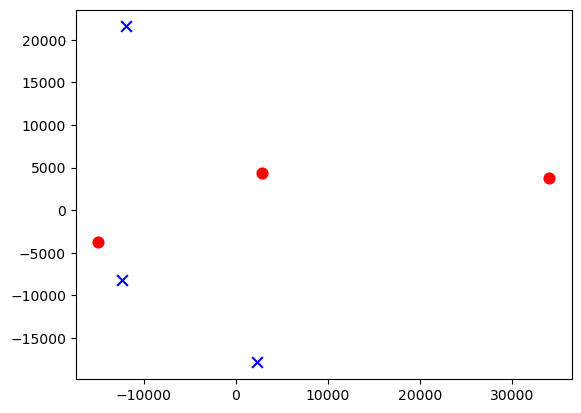

In [6]:
import matplotlib.pyplot as plt

colors = {'cow': 'b', 'chicken': 'r'}
markerTypes = {'cow': 'x', 'chicken': 'o'}

for animalType in markerTypes:
    d = projected[projected['animal'] == animalType]
    plt.scatter(d['pc1'], d['pc2'], c = colors[animalType],
    s = 60, marker = markerTypes[animalType])

plt.show()